In [1]:
import requests
import json
import pandas as pd

df = pd.read_json("https://data.ntpc.gov.tw/api/datasets/71CD1490-A2DF-4198-BEF1-318479775E8A/json")
df.head(25)


,act,ar,aren,bemp,lat,lng,mday,sarea,sareaen,sbi,sna,snaen,sno,tot
0,1,新北市新店區中正路700巷3號,"No. 3, Lane 700 Chung Cheng Road, Xindian Dist...",18,24.991160,121.533980,20201021223437,新店區,Xindian Dist.,19,大鵬華城,Dapeng Community,1001,38
1,1,南昌街/新昌路口(西側廣場),Nanchang St./Xinchang Rd.,50,25.068914,121.662748,20201021223421,汐止區,Xizhi Dist.,6,汐止火車站,Xizhi Railway Station,1002,56
2,1,新台五路一段/仁愛路口(新台五路側汐止地政事務所前機車停車場),"Sec. 1, Xintai 5th Rd./Ren’ai Rd.",26,25.064162,121.658301,20201021223440,汐止區,Xizhi Dist.,18,汐止區公所,Xizhi Dist. Office,1003,46
3,1,建成路78號對面停車場,"No78, Jiancheng Rd",29,25.073150,121.662555,20201021223424,汐止區,Xizhi Dist.,27,國泰綜合醫院,Cathay General Hospital,1004,56
4,1,寶中路/品牌路口(東南側),Baozhong Rd./,13,24.979649,121.546319,20201021223424,新店區,Xindian Dist.,27,裕隆公園,Yulon Park,1005,40
5,1,中興路三段224號(對面),"No. 224, Sec. 3, Zhongxing Rd., Xindian Dist.(...",46,24.982830,121.543620,20201021223418,新店區,Xindian Dist.,48,捷運大坪林站(5號出口),MRT DaPingLin Station(Exit.5),1006,94
6,1,大同路二段184巷/龍安路202巷(西側)(汐科火車站北站出口前),"Ln. 184,Sec. 2, Datong Rd./Ln. 202,Long’an Rd.",15,25.064106,121.653019,20201021223438,汐止區,Xizhi Dist.,19,汐科火車站(北),Xike Railway Station(North),1007,34
7,1,重陽路一段120巷/中華路2巷,"Ln. 120, Sec. 1, Chongyang Rd./Ln. 2, Zhonghua...",16,25.060125,121.483101,20201021223430,三重區,Sanchong Dist.,24,興華公園,Xinghua Park,1008,40
8,1,集美街/重新路四段184巷,"Jimei St., Sanchong Dist./Ln. 184, Sec. 4, Cho...",65,25.054391,121.488489,20201021223442,三重區,Sanchong Dist.,2,三重國民運動中心,San chong Civil Sports Center,1009,68
9,1,捷運路/捷運路37巷,"Jieyun Rd./Ln. 37, Jieyun Rd.",34,25.055883,121.484739,20201021223448,三重區,Sanchong Dist.,0,捷運三重站(3號出口),MRT Sanchong Sta. (Exit 3),1010,34


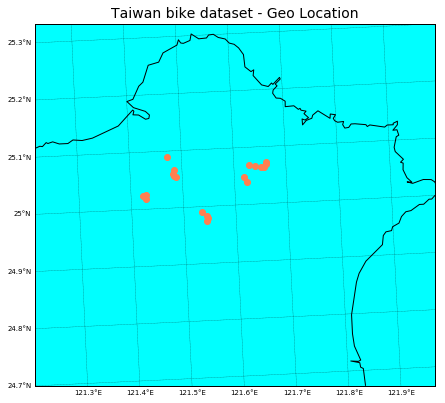

In [3]:
import os
os.environ['PROJ_LIB'] = 'C:/Users/User/Anaconda3/pkgs/proj4-5.2.0-h6538335_1006/Library/share/'

from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(6, 9))
ax = fig.add_axes([0.025, 0.025, 0.925, 0.925])

map = Basemap(llcrnrlon = 121.2, llcrnrlat = 24.7, urcrnrlon = 122.0, urcrnrlat = 25.3,resolution = 'h', epsg = 3415)
map.drawmapboundary(fill_color = 'aqua')
map.drawcoastlines()

parallels = np.arange(24., 26., 0.1)    
map.drawparallels(parallels,labels=[1, 0, 0, 0], fontsize=7, linewidth=0.3)
meridians = np.arange(120., 122.5, 0.1)  
map.drawmeridians(meridians,labels=[0, 0, 0, 1], fontsize=7, linewidth=0.3)

x_list = df["lng"].tolist()
y_list = df["lat"].tolist()

x, y = map(x_list, y_list)
map.scatter(x, y, marker = 'o', c='coral') 

plt.title("Taiwan bike dataset - Geo Location", fontsize=14)
plt.show()